In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Step 1: Load the datasets
credits = pd.read_csv("tmdb_5000_credits_sample.csv")


In [3]:
movies = pd.read_csv("tmdb_5000_movies_sample.csv")

In [4]:
# Step 2: Merge datasets on 'id' and 'movie_id'
credits_renamed = credits.rename(columns={'movie_id': 'id'})
merged_df = movies.merge(credits_renamed, on='id')


In [5]:
# Step 3: Clean the data
movies_cleaned_df = merged_df.drop(columns=['homepage', 'status'])

In [6]:
# Step 4: Weighted Average Score Calculation
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = movies_cleaned_df['vote_average'].mean()
m = movies_cleaned_df['vote_count'].quantile(0.70)

movies_cleaned_df['weighted_average'] = ((R * v) + (C * m)) / (v + m)

In [7]:
# Step 5: Sort by weighted average
sorted_weighted = movies_cleaned_df.sort_values('weighted_average', ascending=False)


C:\Users\Rajasrimathi\AppData\Local\Temp\ipykernel_24680\3329020862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


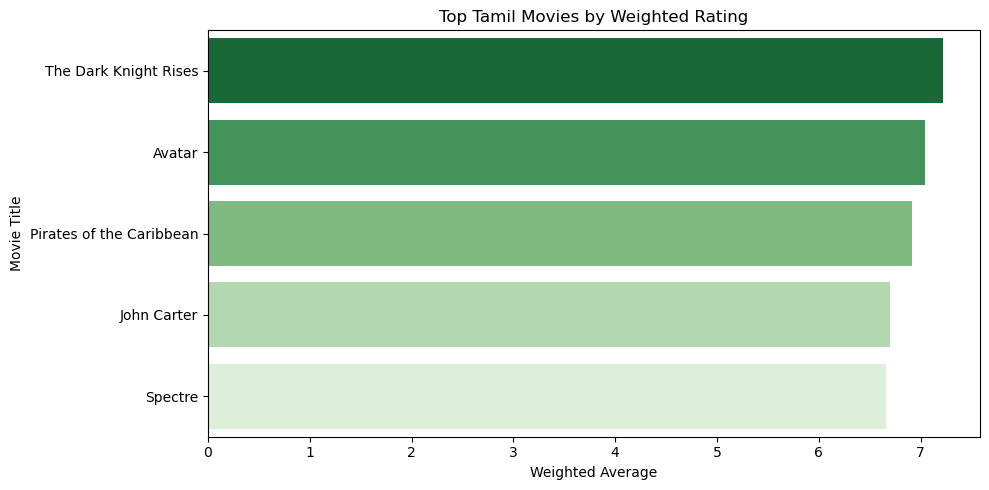

In [8]:
# Plot 1: Best by average rating
plt.figure(figsize=(10, 5))
sns.barplot(
    x=sorted_weighted['weighted_average'],
    y=sorted_weighted['original_title'],
    palette='Greens_r'
)
plt.title("Top Tamil Movies by Weighted Rating")
plt.xlabel("Weighted Average")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.savefig("tamil_best_weighted.png")
plt.show()

In [9]:
# Step 6: Sort by popularity
sorted_popularity = movies_cleaned_df.sort_values('popularity', ascending=False)


C:\Users\Rajasrimathi\AppData\Local\Temp\ipykernel_24680\96840840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


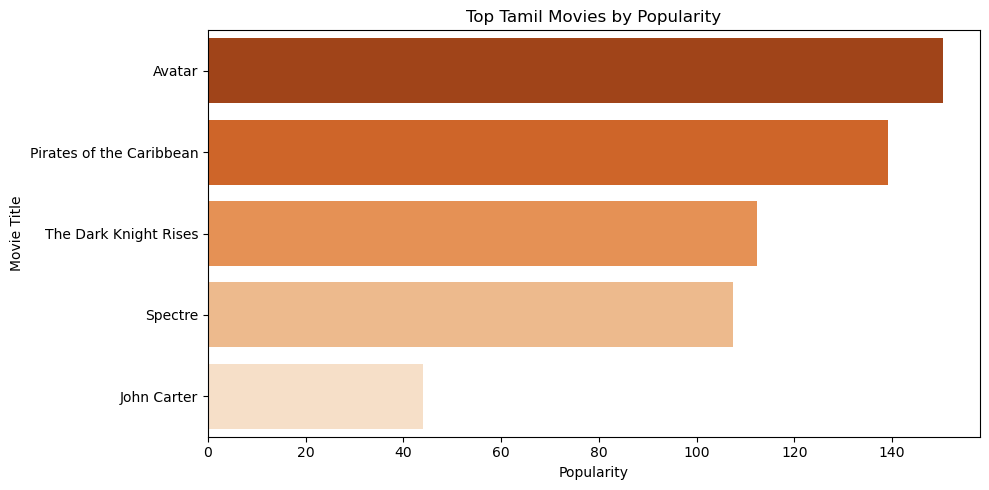

In [10]:
# Plot 2: Most Popular
plt.figure(figsize=(10, 5))
sns.barplot(
    x=sorted_popularity['popularity'],
    y=sorted_popularity['original_title'],
    palette='Oranges_r'
)
plt.title("Top Tamil Movies by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.savefig("tamil_most_popular.png")
plt.show()

In [11]:
# Step 7: Normalize weighted average and popularity
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(movies_cleaned_df[['weighted_average', 'popularity']])
scaled_df = pd.DataFrame(scaled_values, columns=['norm_weighted', 'norm_popularity'])

movies_cleaned_df[['norm_weighted', 'norm_popularity']] = scaled_df


In [12]:
# Step 8: Final Score
movies_cleaned_df['score'] = (
    0.5 * movies_cleaned_df['norm_weighted'] +
    0.5 * movies_cleaned_df['norm_popularity']
)

In [13]:
# Step 9: Final sorted list
final_sorted = movies_cleaned_df.sort_values('score', ascending=False)


In [14]:
# Display top 10 Tamil movies
print("🎬 Top 10 Tamil Movies (Blended Score):\n")
print(final_sorted[['original_title', 'vote_average', 'popularity', 'score']].head(10))

🎬 Top 10 Tamil Movies (Blended Score):

             original_title  vote_average  popularity     score
0                    Avatar           7.2  150.437577  0.841444
3     The Dark Knight Rises           7.6  112.312950  0.821029
1  Pirates of the Caribbean           7.0  139.082615  0.675476
2                   Spectre           6.3  107.376788  0.297857
4               John Carter           6.1   43.926995  0.033644


C:\Users\Rajasrimathi\AppData\Local\Temp\ipykernel_24680\1555160733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


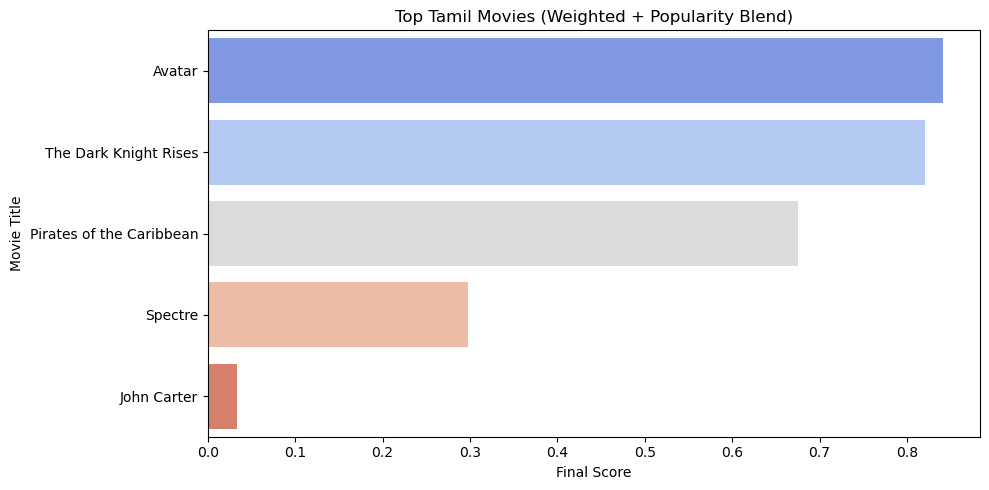

In [15]:
# Plot 3: Final Recommendation
plt.figure(figsize=(10, 5))
sns.barplot(
    x=final_sorted['score'].head(10),
    y=final_sorted['original_title'].head(10),
    palette='coolwarm'
)
plt.title("Top Tamil Movies (Weighted + Popularity Blend)")
plt.xlabel("Final Score")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.savefig("tamil_top_blend.png")
plt.show()
